# Image Classification & Dimensionality Reduction
* Author: Furkan Cantürk
* Date: 03.01.2021

In [20]:
import mnist_reader
import pandas as pd
import random
import numpy as np
from time import time
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.linear_model import Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
np.random.seed(42)
random.seed(42)

# Reading and Scaling Dataset

In [21]:
X_train, y_train = mnist_reader.load_mnist('data', kind='train')
X_test, y_test = mnist_reader.load_mnist('data', kind='t10k')
labels = sorted(set(y_test))
train_size, test_size = y_train.shape[0], y_test.shape[0]

scaler = MinMaxScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

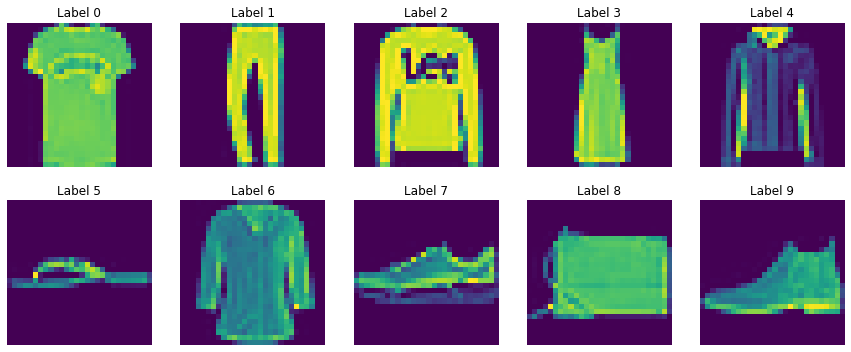

In [3]:
fig, axs = plt.subplots(2,5, figsize=(15,6))
example = iter([(label, X_test[label==y_test][0]) for label in labels])
for i in range(2):
    for j in range(5):
        label, img = next(example)
        axs[i][j].imshow(img.reshape(28,28))
        axs[i][j].set_title('Label '+str(label))
        axs[i][j].axis('off')

# Training Models and Scoring Test Dataset

In [4]:
def score(model, X=scaled_X_test, y=y_test):
    pred_test = model.predict(X)
    accuracy = accuracy_score(pred_test, y)
    cm = pd.DataFrame(confusion_matrix(pred_test, y, labels=labels), index=labels, columns=labels)
    cm.index.rename("Actual", inplace=True)
    
    return pred_test, accuracy, cm

### Perceptron

In [5]:
pt = Perceptron(eta0=0.2, n_jobs=-1, random_state=42)
pt.fit(scaled_X_train, y_train)

pred, acc, cm = score(pt)
print("Test Accuracy:", acc)
print("Confusion Matrix for Test Dataset:")
cm

Test Accuracy: 0.7956
Confusion Matrix for Test Dataset:


,0,1,2,3,4,5,6,7,8,9
Actual,,,,,,,,,,
0,734,4,31,17,0,3,117,0,8,0
1,6,943,3,16,0,0,1,0,0,0
2,39,7,634,39,49,0,155,0,6,0
3,60,23,10,780,12,1,42,0,4,0
4,67,18,301,114,927,2,432,0,17,0
5,1,0,0,0,0,855,0,19,4,1
6,76,1,11,20,10,0,230,0,4,1
7,0,0,1,0,0,68,0,944,5,40
8,17,3,8,8,2,16,23,1,951,0


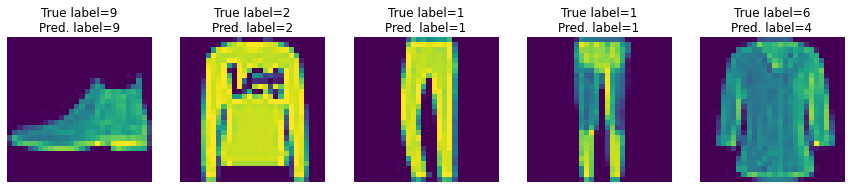

In [6]:
fig, axs = plt.subplots(1,5, figsize=(15,3))
example = iter([(pred[i], y_test[i], X_test[i]) for i in range(5)])
for j in range(5):
    pred_label, true_label, img = next(example)
    axs[j].imshow(img.reshape(28,28))
    axs[j].set_title(f'True label={true_label}\nPred. label={pred_label}')
    axs[j].axis('off')

### K-Nearest Neighbors

In [7]:
knn = KNeighborsClassifier(algorithm='ball_tree',n_neighbors=50, n_jobs=-1, leaf_size=10)
knn.fit(scaled_X_train, y_train)

pred, acc, cm = score(knn, scaled_X_test, y_test)
print("Test Accuracy:", acc)
print("Confusion Matrix for Test Dataset:")
cm

Test Accuracy: 0.826
Confusion Matrix for Test Dataset:


,0,1,2,3,4,5,6,7,8,9
Actual,,,,,,,,,,
0,849,10,18,43,0,1,199,0,2,0
1,0,947,0,6,0,0,1,0,1,0
2,21,10,761,13,112,0,139,0,23,0
3,22,22,5,848,27,2,19,0,5,0
4,11,4,103,46,731,0,84,0,11,0
5,0,0,0,0,0,757,0,1,0,0
6,84,7,108,41,124,7,540,0,18,2
7,1,0,0,0,0,140,0,938,12,35
8,12,0,5,3,6,1,18,0,926,0


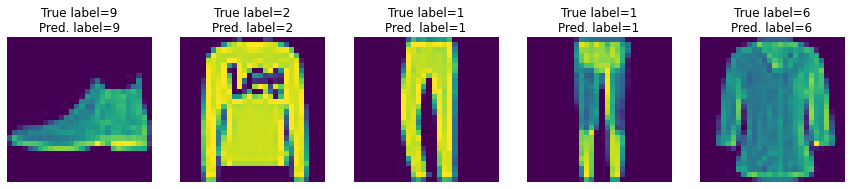

In [8]:
fig, axs = plt.subplots(1,5, figsize=(15,3))
example = iter([(pred[i], y_test[i], X_test[i]) for i in range(5)])
for j in range(5):
    pred_label, true_label, img = next(example)
    axs[j].imshow(img.reshape(28,28))
    axs[j].set_title(f'True label={true_label}\nPred. label={pred_label}')
    axs[j].axis('off')

### Support Vector Machine

In [9]:
rand_idx = np.random.choice(np.arange(len(scaled_X_train)), 10000)
svc = SVC(kernel='rbf', random_state=42)
svc.fit(scaled_X_train[rand_idx], y_train[rand_idx])

pred, acc, cm = score(svc)
print("Test Accuracy:", acc)
print("Confusion Matrix for Test Dataset:")
cm

Test Accuracy: 0.8532
Confusion Matrix for Test Dataset:


,0,1,2,3,4,5,6,7,8,9
Actual,,,,,,,,,,
0,852,4,17,31,1,0,193,0,0,0
1,0,950,0,5,0,0,1,0,0,0
2,6,9,775,8,87,0,122,0,6,0
3,45,30,12,881,34,3,35,0,6,0
4,5,3,116,34,787,0,91,0,1,0
5,2,0,0,0,0,924,0,33,3,19
6,74,3,74,37,85,0,532,0,6,0
7,0,0,0,0,0,48,0,918,5,40
8,16,1,6,4,6,2,26,0,973,1


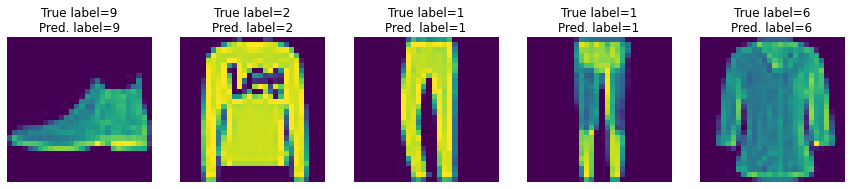

In [10]:
fig, axs = plt.subplots(1,5, figsize=(15,3))
example = iter([(pred[i], y_test[i], X_test[i]) for i in range(5)])
for j in range(5):
    pred_label, true_label, img = next(example)
    axs[j].imshow(img.reshape(28,28))
    axs[j].set_title(f'True label={true_label}\nPred. label={pred_label}')
    axs[j].axis('off')

### Decision Tree

In [11]:
dt = DecisionTreeClassifier(min_samples_leaf=10, max_features='auto',random_state=42)
dt.fit(scaled_X_train, y_train)

pred, acc, cm = score(dt)
print("Test Accuracy:", acc)
print("Confusion Matrix for Test Dataset:")
cm

Test Accuracy: 0.7939
Confusion Matrix for Test Dataset:


,0,1,2,3,4,5,6,7,8,9
Actual,,,,,,,,,,
0,771,8,18,40,8,0,171,0,8,1
1,5,921,1,22,3,0,6,1,1,0
2,22,6,686,19,152,0,130,0,12,0
3,52,39,19,825,50,10,40,0,13,0
4,15,7,141,43,676,1,112,0,11,1
5,3,1,1,0,0,874,1,53,18,43
6,118,12,122,43,100,0,513,0,15,0
7,0,1,0,0,0,62,0,874,11,60
8,14,5,12,7,10,16,27,5,908,4


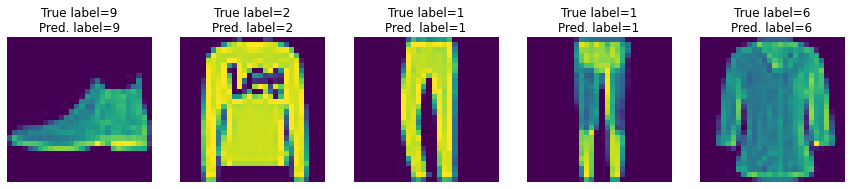

In [12]:
fig, axs = plt.subplots(1,5, figsize=(15,3))
example = iter([(pred[i], y_test[i], X_test[i]) for i in range(5)])
for j in range(5):
    pred_label, true_label, img = next(example)
    axs[j].imshow(img.reshape(28,28))
    axs[j].set_title(f'True label={true_label}\nPred. label={pred_label}')
    axs[j].axis('off')

### Random Forest

In [13]:
rf = RandomForestClassifier(n_jobs=-1, min_samples_leaf=10, n_estimators=20, random_state=42)
rf.fit(scaled_X_train, y_train)

pred, acc, cm = score(rf)
print("Test Accuracy:", acc)
print("Confusion Matrix for Test Dataset:")
cm

Test Accuracy: 0.8602
Confusion Matrix for Test Dataset:


,0,1,2,3,4,5,6,7,8,9
Actual,,,,,,,,,,
0,834,5,11,21,0,0,147,0,0,0
1,0,953,0,2,1,0,0,0,1,0
2,18,7,788,15,104,0,125,0,6,1
3,36,27,11,894,44,1,37,0,4,0
4,5,3,129,38,796,0,105,0,7,0
5,1,0,0,0,1,942,0,21,2,11
6,93,4,55,28,52,0,564,0,8,0
7,0,0,0,0,0,40,0,922,4,42
8,13,1,6,2,2,2,22,0,966,3


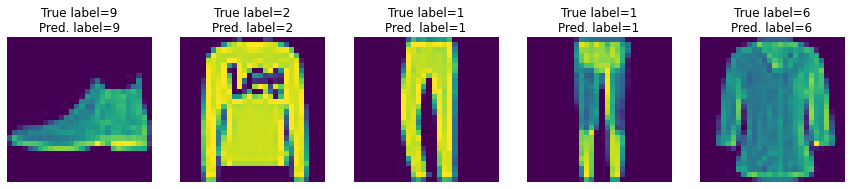

In [14]:
fig, axs = plt.subplots(1,5, figsize=(15,3))
example = iter([(pred[i], y_test[i], X_test[i]) for i in range(5)])
for j in range(5):
    pred_label, true_label, img = next(example)
    axs[j].imshow(img.reshape(28,28))
    axs[j].set_title(f'True label={true_label}\nPred. label={pred_label}')
    axs[j].axis('off')

# Dimensionality Reduction

In [15]:
pca = PCA()
pca.fit(scaled_X_train)

sorted_explain_rat = sorted(pca.explained_variance_ratio_, reverse=True)
cum_explain_rat = np.cumsum(sorted_explain_rat)

n_comp_dict = {}
n_comp_lst = []
ratios = [0.25, 0.5, 0.75, 0.9, 0.95]
EV_ratios = []
for ratio in ratios:
    r = cum_explain_rat[cum_explain_rat <= cum_explain_rat[cum_explain_rat>=ratio][0]]
    n_comp_dict[ratio] = len(r)
    n_comp_lst.append(len(r))
    EV_ratios.append(round(max(r),2))
    print(f"{len(r)} components explains {round(max(r),2)} variance")
    
pca_dict = {n_comp: PCA(n_comp).fit(scaled_X_train) for n_comp in n_comp_lst}

reduced_X_train_dict = {n_comp: pca_dict[n_comp].transform(scaled_X_train) for n_comp in n_comp_lst}
reduced_X_test_dict = {n_comp: pca_dict[n_comp].transform(scaled_X_test) for n_comp in n_comp_lst}

1 components explains 0.29 variance
3 components explains 0.53 variance
14 components explains 0.75 variance
84 components explains 0.9 variance
188 components explains 0.95 variance


# Training the Models on the Reduced Datasets

In [16]:
models = [pt, knn, svc, dt, rf]
model_names = ['Pt', 'KNN', 'SVM', 'DT', 'RF']
result_table = pd.DataFrame(index=model_names, columns=n_comp_lst)
for i,model in enumerate(models):
    for n_comp in n_comp_lst:
        model.fit(reduced_X_train_dict[n_comp], y_train)
        pred, acc, cm = score(model, reduced_X_test_dict[n_comp], y_test)
        result_table.loc[model_names[i], n_comp] = acc

In [18]:
print("Test Accuracy Using n Components:")
result_table

Test Accuracy Using n Components:


,1,3,14,84,188
Pt,0.1083,0.4483,0.675,0.7699,0.7915
KNN,0.2982,0.6486,0.8197,0.843,0.8397
SVM,0.3141,0.6432,0.8395,0.8824,0.8863
DT,0.2569,0.6091,0.7603,0.7383,0.6759
RF,0.2768,0.6505,0.8212,0.8414,0.8385
